# Programmer's Note: Gradient Check

This notebook serves to provide a derivative check. The core idea is to check, for a given $f(x) \in C^2$, whether a gradient $\nabla f(x)$ is correct.

To do this, we compare the $0^\text{th}$ order Taylor expansion:

\begin{align}
  f(x + h v) &= \underbrace{f(x)}_{T_0(x)} + O(h)
\end{align}

and the $1^\text{st}$ order Taylor expansion:

\begin{align}
  f(x + h v) &= \underbrace{f(x) + h\nabla f(x)^\top v}_{T_1(x)} + O(h^2)
\end{align}

Picking a random direction $v$, as $h \to 0$, we should see: $\| f(x + hv) - T_0(x) \|_2 \rightarrow 0$ at a rate of $O(h)$.

And if the expression for $\nabla f(x)$ is correct, we should see $\| f(x + hv) - T_1(x) \|_2 \rightarrow 0$ at a rate of $O(h^2)$.


In [ ]:
from sympy import symbols, Matrix, vector, exp, diff, solve
from sympy.vector import gradient
import numpy as np
from numpy.linalg import norm
from numpy import gradient 

# Define Functions (this is the only part of the code you need to modify)

To get you started, this code uses an example objective function $f(x) = \|x\|_2^2 = x^T x$, whose gradient is simply $\nabla f(x) = 2x$. See what happens (in the plots further down in this notebook) when you use the correct gradient and various incorrect gradients.

In the future, you can re-use this code by plugging in whaveter objective function $f(x)$ you are interested in, and confirming that your gradient calculation for $\nabla f(x)$ is correct.

In [ ]:
def f(x):
  # Put your function here
  return np.matmul(x.transpose(), x)



def grad_f(x):
  # Put your (suspected) gradient here
  return 2*x # this is the correct gradient
  # return 1.99*x # this is an incorrect gradient; try it!
  # return x**2 # this is an incorrect gradient; try it!

# Run Check Derivative

In [41]:
dim = 5
x = np.random.randn(dim)
v = np.random.randn(dim)

max_iters = 32
h = np.zeros(max_iters)
err0 = np.zeros(max_iters)
err1 = np.zeros(max_iters)

for i in range(max_iters):
  h[i] = 2**(-i) # halve our stepsize every time

  fv = f(x + h[i]*v)
  T0 = f(x)

  T1 = T0 + h[i]*np.matmul(grad_f(x).transpose(), v)

  err0[i] = np.linalg.norm(fv - T0) # this error should be linear in h
  err1[i] = np.linalg.norm(fv - T1) # this error should be quadratic in h

  print('h: %.3e, \t err0: %.3e, \t err1: %.3e' % (h[i], err0[i], err1[i]))

h: 1.000e+00, 	 err0: 7.170e+00, 	 err1: 6.827e+00
h: 5.000e-01, 	 err0: 1.878e+00, 	 err1: 1.707e+00
h: 2.500e-01, 	 err0: 5.126e-01, 	 err1: 4.267e-01
h: 1.250e-01, 	 err0: 1.496e-01, 	 err1: 1.067e-01
h: 6.250e-02, 	 err0: 4.814e-02, 	 err1: 2.667e-02
h: 3.125e-02, 	 err0: 1.740e-02, 	 err1: 6.667e-03
h: 1.562e-02, 	 err0: 7.034e-03, 	 err1: 1.667e-03
h: 7.812e-03, 	 err0: 3.100e-03, 	 err1: 4.167e-04
h: 3.906e-03, 	 err0: 1.446e-03, 	 err1: 1.042e-04
h: 1.953e-03, 	 err0: 6.969e-04, 	 err1: 2.604e-05
h: 9.766e-04, 	 err0: 3.420e-04, 	 err1: 6.511e-06
h: 4.883e-04, 	 err0: 1.694e-04, 	 err1: 1.628e-06
h: 2.441e-04, 	 err0: 8.427e-05, 	 err1: 4.069e-07
h: 1.221e-04, 	 err0: 4.203e-05, 	 err1: 1.017e-07
h: 6.104e-05, 	 err0: 2.099e-05, 	 err1: 2.543e-08
h: 3.052e-05, 	 err0: 1.049e-05, 	 err1: 6.358e-09
h: 1.526e-05, 	 err0: 5.243e-06, 	 err1: 1.589e-09
h: 7.629e-06, 	 err0: 2.621e-06, 	 err1: 3.974e-10
h: 3.815e-06, 	 err0: 1.310e-06, 	 err1: 9.934e-11
h: 1.907e-06, 	 err0: 6.552e-07

# Let's now plot our errors.

We wil use a log-log plot so that both axes are in log-scale.

On a log-log plot, we expect the slope of $\|f(x) - T_0(x)\|_2$ to be $1$. And if the gradient is correct, we expect the slope of $\|f(x) - T_1(x)\|_2$ to be $2$. If you don't see that the slope of the orange curve is $2$ as $h \to 0$, your gradient is incorrect!

(array([1.e-19, 1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05,
        1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05]),
 [Text(0, 1e-19, '$\\mathdefault{10^{-19}}$'),
  Text(0, 1e-17, '$\\mathdefault{10^{-17}}$'),
  Text(0, 1e-15, '$\\mathdefault{10^{-15}}$'),
  Text(0, 1e-13, '$\\mathdefault{10^{-13}}$'),
  Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 1e-09, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 1e-05, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$')])

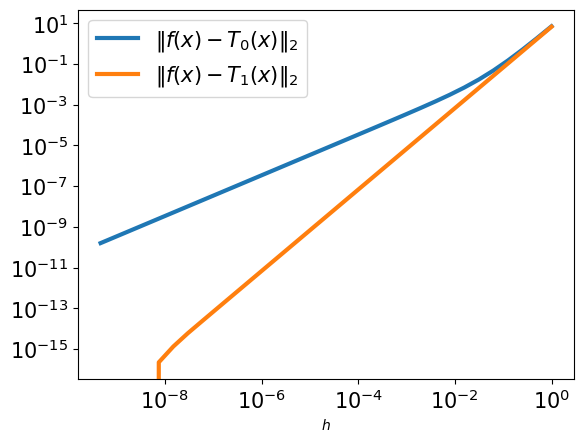

In [42]:
import matplotlib.pyplot as plt

plt.loglog(h, err0, linewidth=3)
plt.loglog(h, err1, linewidth=3)
plt.legend(['$\|f(x) - T_0(x)\|_2$', '$\|f(x)-T_1(x)\|_2$'], fontsize=15)
plt.xlabel("$h$")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)